<IPython.core.display.Javascript object>


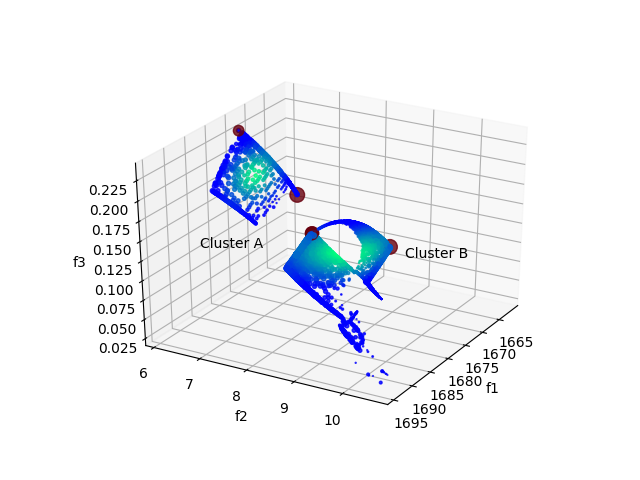

In [7]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook makes different plots for the carcrash problem.
"""

import os
import sys
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz.utils import fmt
from paretoviz import decorator as dcor
from paretoviz import plotting as pplt

c1raw = "../data/carcrash/carcrash-c1/carcrash-c1-3d.out"
c2raw = "../data/carcrash/carcrash-c2/carcrash-c2-3d.out"

c1path, c1rfname = os.path.split(c1raw)
c2path, c2rfname = os.path.split(c2raw)

c1prefix = c1rfname.split('.')[0]
c2prefix = c2rfname.split('.')[0]

c1npts = fmt.load(os.path.join(c1path, c1prefix + "-norm.out"))
c2npts = fmt.load(os.path.join(c2path, c2prefix + "-norm.out"))

c1mu = [v[0] if len(v) == 1 else v for v in fmt.load(os.path.join(c1path, c1prefix + "-norm-mu.out"))]
c2mu = [v[0] if len(v) == 1 else v for v in fmt.load(os.path.join(c2path, c2prefix + "-norm-mu.out"))]

c1s = dcor.rescale_by_tradeoff(c1mu)
c2s = dcor.rescale_by_tradeoff(c2mu)
c1c = dcor.recolor_by_centroid(c1npts, factor = 4.0)
c2c = dcor.recolor_by_centroid(c2npts, factor = 1.5)
(c1c, c1kidx) = dcor.recolor_by_tradeoff(c1s, c1c)
(c2c, c2kidx) = dcor.recolor_by_tradeoff(c2s, c2c)

# for scatter plot, use the original objective value
c1rpts = fmt.load(c1raw)
c2rpts = fmt.load(c2raw)
pts = c1rpts + c2rpts
c1s = [v * 0.33 for v in c1s]
c2s = [v * 0.33 for v in c2s]
for i in c1kidx:
    c1s[i] = c1s[i] * 3.33
for i in c2kidx:
    c2s[i] = c2s[i] * 3.33    
s = c1s + c2s
c = c1c + c2c

(fig, ax) = pplt.scatter(pts, s = s, c = c, camera = [30, 30], alpha = [0.2, 0.8])
ax.text(1690, 6.50, 0.130, "Cluster A")
ax.text(1660, 8.50, 0.050, "Cluster B")

ofname = "../data/carcrash/carcrash-3d-norm-scatter-combined.pdf"
plt.savefig(ofname, transparent = False)

plt.show()